In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Load the CSV file into a DataFrame
df=pd.read_csv('data\\Advertising.csv')
# Features (inputs)
X=df[['TV', 'radio', 'newspaper']].values
# Target (output)
y=df['sales'].values
# Split into 70% train, 30% test
#train_test_split => split dataset into training and testing subsets.
#test_size => Uses 30% of the data for testing
#random_state =>  Seed for random number generator. Ensures reproducibility (same split every time)
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.3, random_state=42)
#print("X_train: ", X_train) 
# print("X_test: ", X_test)
# print("y_train: ", y_train)
# print("y_test: ", y_test)
#.shape is a tuple that shows (number_of_rows, number_of_columns)
#X_train.shape => how many samples and features are in the training set
#X_test.shape => how many samples and features are in the test set
print(X_train.shape, X_test.shape)


(140, 3) (60, 3)


In [31]:
## feature scaling 
from sklearn.preprocessing import StandardScaler
#StandardScaler standardizes your features by removing the mean and scaling to unit variance.
scale = StandardScaler()
#fit(X_train) => calculates the mean and standard deviation of each feature in your training data.
#transform(X_train) => standardizes each feature: Xscaled = X - mean / std

X_scaled = scale.fit_transform(X_train)
#print(X_scaled)
#Shows the first 5 rows of the original df DataFrame.
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [49]:
## linear regression model 
from sklearn.linear_model import LinearRegression
#Creates a Linear Regression model object
lr = LinearRegression()
#Trains (or "fits") the model using your standardized features (X_scaled) and target values (y_train)
#lr.fit(X_scaled, y_train)
#Use original (unscaled) data
lr.fit(X_train, y_train)

print(lr.coef_, lr.intercept_)
# Now you can access real, interpretable coefficients
#print(dict(zip(X.columns, lr.coef_)))
# print(lr.coef_)
# print(lr.intercept_)
feature_names = ['TV', 'radio', 'newspaper']
for name, coef in zip(feature_names, lr.coef_):
    print(f"{name}: {coef:.4f}")

#These coefficients show how much the sales will change when each ad channel increases by 1 unit, assuming all else stays the same.
#The coefficient for Newspaper is much smaller compared to TV and Radio.
#This means that increasing newspaper advertising by 1 unit only results in a very small change in sales, while TV and especially Radio have a stronger effect.
#In linear regression, the magnitude of the coefficient represents the impact of that feature.
#Since Newspaper has the smallest coefficient, it contributes the least to predicted sales.
#So, if a company wants to reduce budget with the least effect on sales, newspaper ads are the first candidate to cut.

[0.04405928 0.1992875  0.00688245] 2.7089490925159048
TV: 0.0441
radio: 0.1993
newspaper: 0.0069


In [50]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#apply the same transformation used on the training data to the test set.
X_test_scaled = scale.transform(X_test)
#predict sales based on the scaled test data
ytest_pred = lr.predict(X_test_scaled)
print("Test Data")
#average absolute difference between predicted and actual values (MAE)
#how many units off are your predictions from the true values?
#Lower is better
mae = mean_absolute_error(y_test, ytest_pred)
print('Mean absolute error: ', mae)

#average squared difference between predicted and actual values (MSE)
#Punishes large errors more heavily than MAE (because of squaring).
#Lower is better
mse = mean_squared_error(y_test, ytest_pred)
print('Mean squared error: ', mse)

#how well your model explains the variance in the target variable (R2)
#Ranges from 0 to 1 (or even negative if model performs worse than a horizontal line):
    # 1.0 → perfect prediction
    # 0.0 → model does no better than the mean
    # < 0 → model is worse than just predicting the average
# Higher is better (closer to 1)
r2 = r2_score(y_test, ytest_pred)
print('R2 score is: ', r2)



Test Data
Mean absolute error:  10.234241889655182
Mean squared error:  130.63774070198002
R2 score is:  -3.7844575943797043


In [45]:
# linear regression model performed on the training data (X_train, y_train) instead of the test set
ytrain_pred = lr.predict(X_scaled)
print("Train Data")
#Tells you on average, how far off your predictions are from the actual training values.
#Example: If mae = 0.8, your model’s predictions are off by 0.8 sales units on average in the training set.
mae = mean_absolute_error(y_train, ytrain_pred)
print('Mean absolute error: ', mae)

#Similar to MAE, but squares the errors before averaging.
#Larger mistakes are penalized more heavily (as explained earlier).
mse = mean_squared_error(y_train, ytrain_pred)
print('Mean squared error: ', mse)

# Measures how much of the variance in the actual sales your model is able to explain.
# If r2 = 0.95, it means 95% of the variation in sales is explained by the model on the training data.
# r2 = 1.0 is perfect.
# r2 = 0 means the model performs as badly as just guessing the average.
r2 = r2_score(y_train, ytrain_pred)
print('R2 score is: ', r2)



Train Data
Mean absolute error:  1.1581502948072526
Mean squared error:  2.4793551789057866
R2 score is:  0.9055159502227753


In [51]:
#How well the model fits the data it was trained on.
#Whether it's overfitting (i.e., doing great on training but poor on testing).
print("Train R2:", r2_score(y_train, ytrain_pred))
print("Test R2:", r2_score(y_test, ytest_pred))


Train R2: 0.9055159502227753
Test R2: -3.7844575943797043


In [20]:
# import matplotlib.pyplot as plt
# plt.scatter(y_test, ytest_pred)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
# plt.xlabel("Actual Sales")
# plt.ylabel("Predicted Sales")
# plt.title("Predicted vs Actual Sales")
# plt.show()

In [19]:
# residuals = y_test - ytest_pred

# plt.scatter(ytest_pred, residuals)
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel("Predicted Sales")
# plt.ylabel("Residuals")
# plt.title("Residuals vs Predicted Values")
# plt.show()

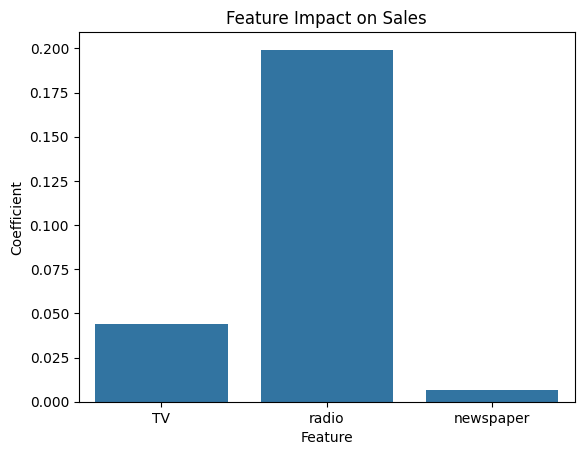

In [52]:
#coefficient bar plot
import pandas as pd
import seaborn as sns

feature_names = ['TV', 'radio', 'newspaper']
coefs = lr.coef_

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
sns.barplot(x='Feature', y='Coefficient', data=coef_df)
plt.title("Feature Impact on Sales")
plt.show()

In [11]:
# Use original (unscaled) data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # No scaling here!
# lr = LinearRegression()
# lr.fit(X_train, y_train)

# # Now coefficients directly tell you: 1 unit of TV = X change in sales
# print(dict(zip(['TV', 'radio', 'newspaper'], lr.coef_)))
#print(dict(zip(X.columns, lr.coef_)))

# X = df[['TV', 'radio', 'newspaper']]
# y = df['sales']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# lr = LinearRegression()
# lr.fit(X_train, y_train)

# # Now you can access real, interpretable coefficients
# print(dict(zip(X.columns, lr.coef_)))

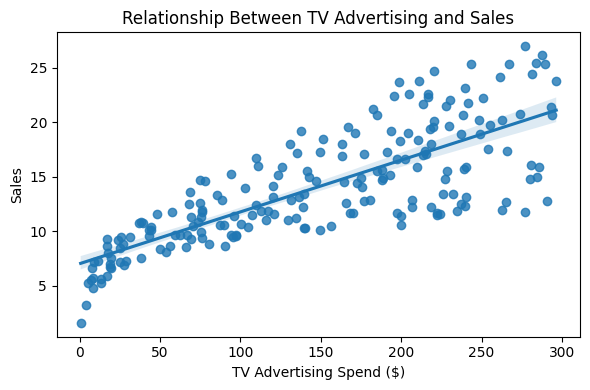

In [53]:
#Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# # Load and prepare data
df = pd.read_csv('data/Advertising.csv')
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# # Train model without scaling
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# lr = LinearRegression()
# lr.fit(X_train, y_train)

# # Get coefficients
# coefs = pd.DataFrame({
#     'Feature': X.columns,
#     'Coefficient': lr.coef_
# })

# # Predict for visualization
# y_pred = lr.predict(X_test)

# # 1. Coefficient bar plot
# plt.figure(figsize=(6, 4))
# sns.barplot(x='Feature', y='Coefficient', data=coefs)
# plt.title('Impact of Each Advertising Channel on Sales')
# plt.ylabel('Coefficient Value')
# plt.xlabel('Advertising Channel')
# plt.tight_layout()
# plt.show()

# 2. TV vs Sales regression plot
plt.figure(figsize=(6, 4))
sns.regplot(x='TV', y='sales', data=df)
plt.title('Relationship Between TV Advertising and Sales')
plt.xlabel('TV Advertising Spend ($)')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# # 3. Predicted vs Actual Sales plot
# plt.figure(figsize=(6, 4))
# sns.scatterplot(x=y_test, y=y_pred)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
# plt.title('Predicted vs Actual Sales')
# plt.xlabel('Actual Sales')
# plt.ylabel('Predicted Sales')
# plt.tight_layout()
# plt.show()

# # 4. Print interpretation
# print("Interpretation:")
# print(f"TV Coefficient: {lr.coef_[0]:.4f}")
# print("→ For every $1 increase in TV advertising, sales increase by {:.4f} units.".format(lr.coef_[0]))

In [42]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Partial plot - TV vs Sales, controlling for Radio and Newspaper
# sns.regplot(x=df['TV'], y=model.resid + model.fittedvalues, line_kws={"color":"red"})
# plt.xlabel('TV Advertising Spend ($)')
# plt.ylabel('Predicted Sales')
# plt.title('Effect of TV Ads on Sales (controlling for other media)')
# plt.show()